In [12]:
import numpy as np #Maths
import matplotlib.pyplot as plt #Graphs
from astropy import units as unit #woo units
from astropy.visualization import quantity_support #This is needed so graphs works with units
quantity_support() #This turns on graphs with units

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x6384610>

In [13]:
#Equation to handle calculating gravitational force
def Gravity_Force(mass, g):
    '''
    A function to calculate the force of gravity acting on an object with mass
    Inputs: 
        mass(units.kg), the mass of the object
        g(units.m/units.s), the gravitational accelleration the object is subjected to
    Outputs:
        units.N, a calculated force
    '''
    return((mass*g).to(unit.N))

In [54]:
def Drag_Force(crossarea, dragcoeffecient, velocity, altitude):
    '''
    A function to calculate the drag force a falling body experiences through an atmosphere
    Inputs:
        crossarea(unit.m**2), the cross sectional area of the object. Any length^2 unit should work
        dragcoeffecient(unitless), a coeffecient based off of the shape of the object. See https://en.wikipedia.org/wiki/Drag_coefficient\
        velocity(unit.m/unit.s), the instantaneous velocity the object is moving at
        altitude(unit.m), the current altitude of the object. Used in Atmosphere_Density
    Outputs:
        unit.N, a calculated force
    '''
    return((1/2 * dragcoeffecient * crossarea * velocity**2 * Atmosphere_Density(altitude)).to(unit.N))

In [38]:
#Equation to give an accelleration by combining all relevant forces
def Accelleration_Calculator(mass, g, crossarea, dragcoeffecient, v0, altitude):
    '''
    A calculator function to find the instantaneous accelleration of a falling object
    Inputs:
        mass, g for use in Gravity_Force
        crossarea, dragcoeffecient, v0, altitude for use in Drag_Force
    Outputs:
        unit.m/unit.s**2, a calculated accelleration an object with the above parameters has
    '''
    return((Gravity_Force(mass, g) + Drag_Force(crossarea, dragcoeffecient, v0, altitude)) / mass).to(unit.m/(unit.s)**2)


In [39]:
#Equation to work with our accellerations and our time intervals
def Velocity_Calculator(mass, g, dtime, v0, crossarea, dragcoeffecient, altitude):
    '''
    A calculator function to find the instantaneous velocity of a falling object
    Inputs:
        mass, g for use in Gravity_Force
        dragparam, v0 for use in Drag_Force
        dtime(unit.s), a time interval the calculator will calculate over
        v0 is also used as the starting velocity, accelleration will give a dV so we have an initial condition
    Outputs:
        unit.m/unit.s, a calculated velocity an object with the above parameters has
    '''
    return (Accelleration_Calculator(mass, g, crossarea, dragcoeffecient, v0, altitude) * dtime + v0).to(unit.m/unit.s)


In [40]:
#Equation to go from velocity to position
def Position_Calculator(mass, g, dtime, v0, p0, crossarea, dragcoeffecient):
    '''
        A calculator function to find the instantaneous velocity of a falling object
    Inputs:
        mass, g for use in Gravity_Force
        dragparam, v0 for use in Drag_Force
        v0 for use in Velocity_Calculator
        dtime(unit.s), a time interval the calculator will calculate over
    Outputs:
        unit.m, a calculated position an object with the above parameters has
    '''
    return(Velocity_Calculator(mass, g, dtime, v0, crossarea, dragcoeffecient, p0) * dtime + p0).to(unit.m)


In [41]:
#Function to make sure we are still falling, not hitting the ground
def Impact_Finder(currentposition):
    if(currentposition <=0 * unit.m):
        return(True)
    else:
        return(False)

OK Functions done, now time for interface

In [19]:
#TODO List
#Work out new inputs for Drag_Force
    #Density from Atmosphere, Velocity, Crosssectionarea*coeffecient of drag
    #use quadratic drag
#add a density param for object
    #squishyness of object
#Atmpospheric Desnity graph as function of time? or altitude?
    #I think of altitude should be shown
#Figure out our drag equation
#maybe show how this method compares to actual e^whatever function
    #https://en.wikipedia.org/wiki/Drag_(physics)#Low_Reynolds_Numbers:_Stokes'_drag
#Experiment away?
    #Will need parameters to test over(range)
    #main thing is atmosphere functions, get this right

In [20]:
#Euler's Method for Falling Object

In [62]:
#The Experiment Setup
mass = 70 * unit.kg                        #mass
g = -9.8 * (unit.m/(unit.s**2))            #gravitational accelleration
crossarea = 1 * unit.m**2                 #cross sectional area
dragcoeffecient = 0.8                     #unitless drag coeffecient
v0 = 0 * (unit.m/unit.s)                  #initial velocity
p0 = 1000 * unit.m                      #initial position
time_end = 200                            #simulation length (units added later)
                                         #(Graphs will truncate to impact, but this can be used for middle of fall)
time_interval = 0.1                        #time interval (dTime size)(units added later)
def Atmosphere_Density(altitude):
    '''
    This function will return the density of a simulation's atmosphere at a given altitude
    Input: Altitude(unit.m), the altitude you want to survey
    Output: Atmospheric Density (unit.kg/unit.m^3)
    '''
#     if(altitude > 10000*unit.m):
#         return(0 * unit.kg/unit.m**3)
#     else:
#         return(1.293 * unit.kg/unit.m**3)
    return(1.293 * unit.kg/unit.m**3)

Text(0, 0.5, 'Atmospheric Density')

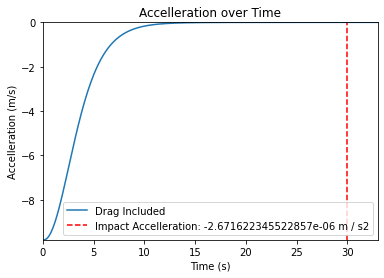

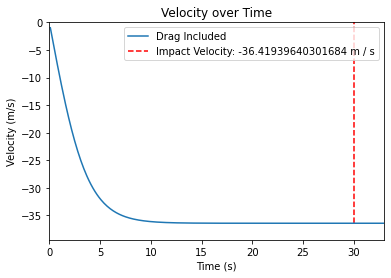

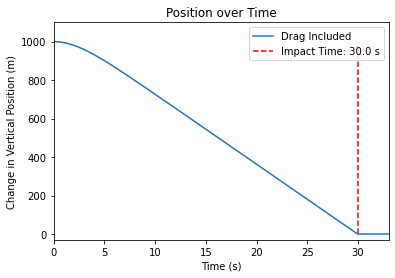

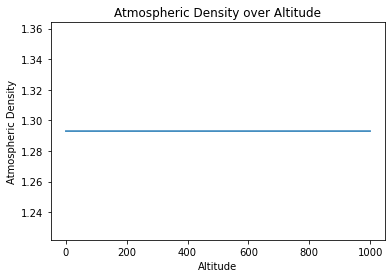

In [63]:
#This will setup a discrete Time coordinate, as well as handle dtime calculation
TimeSteps = np.linspace(0, time_end, int(time_end/time_interval + 1)) * unit.s #This will do 0-100 seconds, .1 second interval
dTimeSteps = (np.zeros(int(time_end/time_interval + 1)) + time_interval) * unit.s

#This function will run through and calculate all the velocities at out time steps
#The velocities are absolute velocities at that time (not dVelocity), function makes sure to factor in previous velocity
AccellerationValues = [g]
VelocityValues = [v0]
PositionValues = [p0]
ImpactTime=['empty']
ImpactVelocity = ['empty']
for i in range(len(dTimeSteps)):
    VelocityValues.append(Velocity_Calculator(mass, g, dTimeSteps[i], VelocityValues[i], crossarea, dragcoeffecient, PositionValues[i]))
    AccellerationValues.append(Accelleration_Calculator(mass, g, crossarea, dragcoeffecient, VelocityValues[i], PositionValues[i]))
    PositionValues.append(Position_Calculator(mass, g, dTimeSteps[i], VelocityValues[i], PositionValues[i], crossarea, dragcoeffecient))
    if(Impact_Finder(PositionValues[i]) == True):
        PositionValues[i] = 0 * unit.m #Correct stuff that hits ground to not move
    if((ImpactTime == ['empty']) & (PositionValues[i] == 0 * unit.m)): #Looks for first instance of position 0
        ImpactTime = TimeSteps[i] #And stores the first time that has position 0 which was corrected by Impact_Finder
        ImpactVelocity = VelocityValues[i]
        ImpactAccelleration = AccellerationValues[i]
    
    
    
    
    
tempTime = []    
for i in range(len(TimeSteps)): #I dislike this workaround greatly, I will find a better way
    tempTime.append(TimeSteps[i].value)    
    
######################################################################################    
temp=[]
for i in range(len(AccellerationValues)): #I dislike this workaround greatly, I will find a better way
    temp.append(AccellerationValues[i].value)
plt.figure(3)
plt.plot(tempTime[1:], temp[1:-1], label = 'Drag Included')
plt.title('Accelleration over Time')
plt.ylabel('Accelleration (m/s)')
plt.xlabel('Time (s)')

#plt.plot(tempTime, np.asarray(tempTime) * 0 + g, linestyle = '--', label = 'No Drag') #This shows continuous expected
plt.xlim(right = ImpactTime.value + 3, left = 0)
plt.ylim(bottom = np.min(temp), top = np.max(temp))
plt.vlines(ImpactTime.value, np.min(temp), ImpactAccelleration.value, color = 'r', linestyle = '--', label = 'Impact Accelleration: ' + str(ImpactAccelleration))

plt.legend()    
#######################################################################################    
temp=[]
for i in range(len(VelocityValues)): #I dislike this workaround greatly, I will find a better way
    temp.append(VelocityValues[i].value)
plt.figure(1)
plt.plot(tempTime[1:], temp[1:-1], label = 'Drag Included')
plt.title('Velocity over Time')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')

#plt.plot(tempTime, np.asarray(tempTime) * g, linestyle = '--', label = 'No Drag') #This shows continuous expected
plt.xlim(right = ImpactTime.value + 3, left = 0)
plt.ylim(bottom = ImpactVelocity.value - 3, top = np.max(temp))
plt.vlines(ImpactTime.value, ImpactVelocity.value, v0.value, color = 'r', linestyle = '--', label = 'Impact Velocity: ' + str(ImpactVelocity))

plt.legend()
######################################################################################
temp=[]
for i in range(len(PositionValues)): #I dislike this workaround greatly, I will find a better way
    temp.append(PositionValues[i].value)
plt.figure(2)
plt.plot(tempTime[1:], temp[1:-1], label = 'Drag Included')
plt.title('Position over Time')
plt.ylabel('Change in Vertical Position (m)')
plt.xlabel('Time (s)')

#plt.plot(tempTime, (np.asarray(tempTime)**2 * g/2).value + p0.value, linestyle = '--', label = 'No Drag') #This shows continuous expected
plt.xlim(right = ImpactTime + 3*unit.s, left = 0*unit.s)
plt.ylim(bottom = -30 * unit.m, top = np.max(temp) * 1.1)
plt.vlines(ImpactTime, 0*unit.m, np.max(temp), color = 'r', linestyle = '--', label = 'Impact Time: ' + str(ImpactTime))

plt.legend()
##########################################################################################
temp2 = []
for i in range(len(PositionValues)): #I dislike this workaround greatly, I will find a better way
    temp2.append(Atmosphere_Density(PositionValues[i]).value)
plt.figure(4)
plt.plot(temp[:-1], temp2[:-1])
plt.title('Atmospheric Density over Altitude')
plt.xlabel('Altitude')
plt.ylabel('Atmospheric Density')